## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./data/homework-practice-03-data.csv')

In [3]:
df

,f0,f1,f2,f3,f4,f5,f6
0,16.99,1.01,0.976270,-3.697815,0.623295,0.524760,7199.992000
1,10.34,1.66,4.303787,7.715073,0.886961,0.473862,2466.136700
2,21.01,3.50,2.055268,-6.464284,0.618826,1.657394,2969.369100
3,23.68,3.31,0.897664,1.335254,0.133461,1.234554,1040.665300
4,24.59,3.61,-1.526904,-0.196414,0.980580,3.086397,37.469975
...,...,...,...,...,...,...,...
239,29.03,5.92,1.735687,-13.698386,0.242179,0.380866,10197.773000
240,27.18,2.00,7.277112,-2.846560,0.250398,0.985390,19277.715000
241,22.67,2.00,-7.649363,1.349522,0.483394,1.300277,2532.079000
242,17.82,1.75,0.347582,-2.334228,0.039993,0.024572,2620.426300


## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2.

In [4]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

import seaborn

In [5]:
X, y = df.drop('f1', axis=1), df['f1']
X = sklearn.preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [6]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.48110772769544996

In [7]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.4837400453179822

#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [8]:
reg.coef_

array([ 0.87930406,  0.04854226, -0.00546106, -0.03145781,  0.12586818,
        0.0271006 ])

In [9]:
lasso.coef_

array([ 0.87035387,  0.03695792, -0.        , -0.02014288,  0.11426307,
        0.01866781])

#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

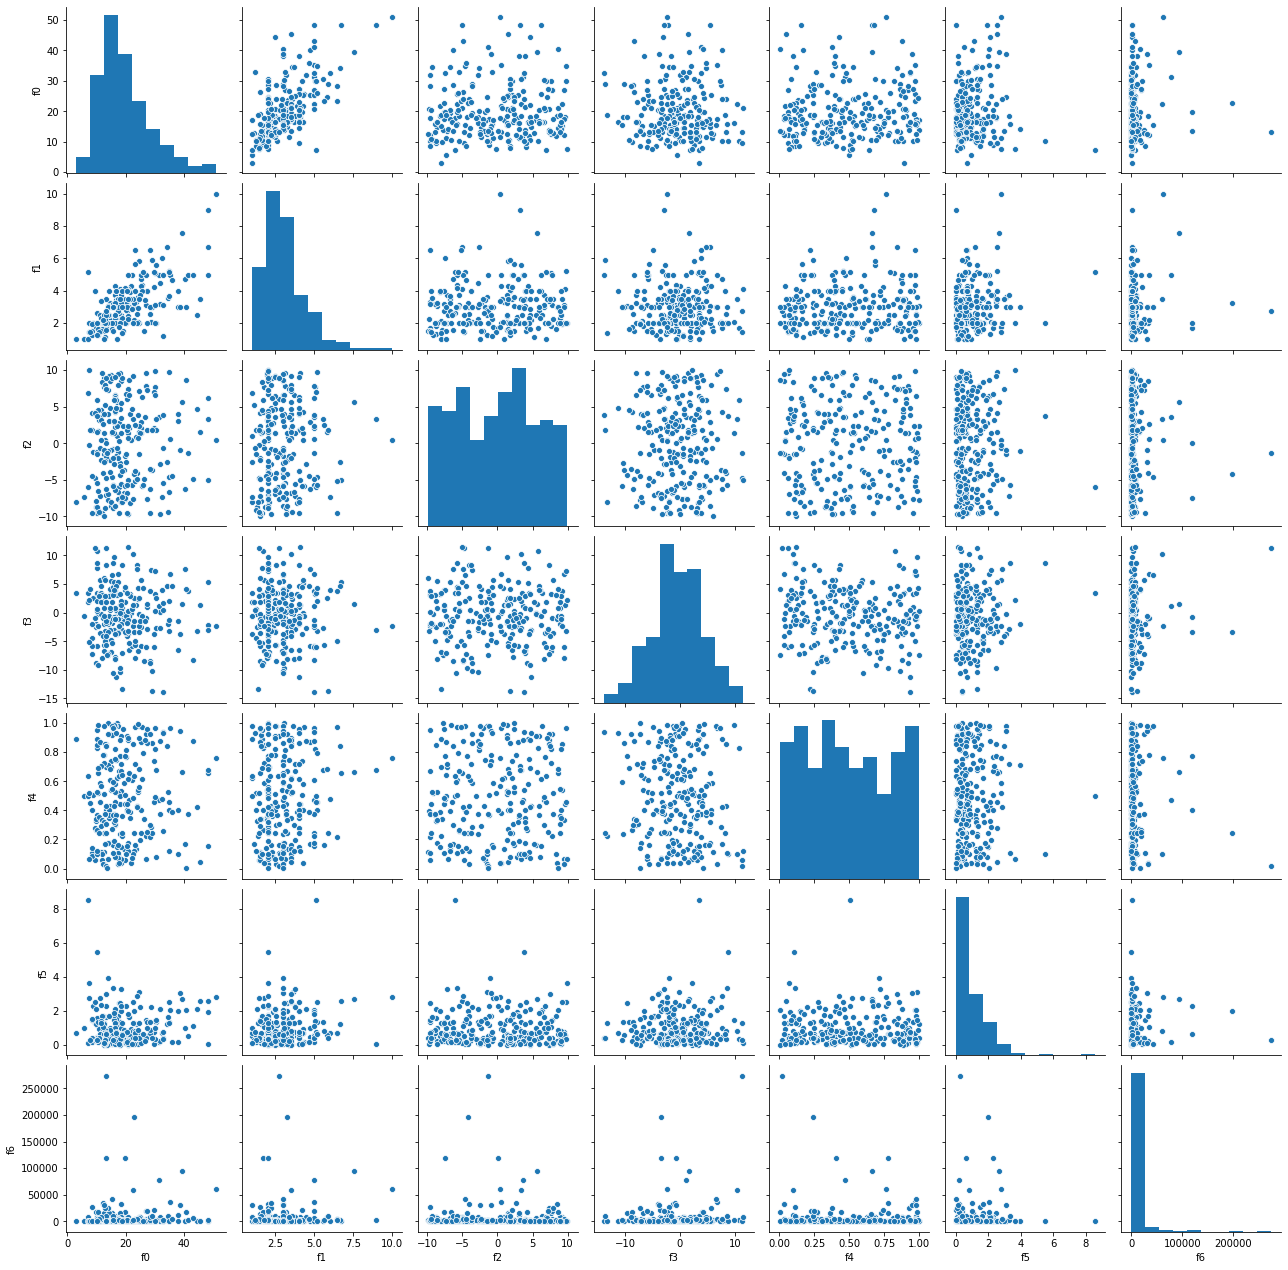

In [10]:
seaborn.pairplot(df)

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Укажите ссылку на посылку (run-report):

$$
\frac{\partial L_\delta(a,y)}{w_i}=
\begin{cases}
 -x_i (y - (w, x)),                   & |y - a| \le \delta, \\
 -\delta x_i\ sign(y - (w, x))        & \textrm{иначе.}
\end{cases}
$$

In [11]:
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt

class MyLinearRegression(BaseEstimator):
    def __init__(self, loss='mse', gd_type='stochastic', delta=1.0,
                 tolerance=1e-4, max_iter=1000, w0=None, alpha=1e-3, eta=1e-2):
        """
        loss: 'mse' or 'huber'
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        delta: parameter for Huber loss function
        """
        
        self.delta = delta
        self.gd_type = gd_type
        self.loss = loss
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        if self.w0 is None:
            self.w0 = np.random.uniform(0, 1, size=(X.shape[1], 1))
        
        if self.gd_type == 'full':
            self._full_gd(X, y)
        elif self.gd_type == 'stochastic':
            self._stochastic_gd(X, y)
        else:
            raise RuntimeError(f'Unknown gradient type "{self.gd_type}"')

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        return X @ self.w
    
    def _calc_gradient_mse(self, X, y, need_avg=True):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """

        y = np.expand_dims(y, axis=1)
        a = X @ self.w
        grads = -2 * X * (y - a) / X.shape[0]
        if need_avg:
            return np.expand_dims(np.sum(grads, axis=0), axis=1)
        return grads

    def _calc_loss_mse(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """

        y = np.expand_dims(y, axis=1)
        a = X @ self.w
        return np.sum(np.square(y - a)) / X.shape[0]
    
    def _calc_grad_huber(self, X, y, need_avg=True):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        
        y = np.expand_dims(y, axis=1)
        a = X @ self.w
        grads = np.zeros((X.shape[0], self.w.shape[0]))
        
        mask = np.squeeze(np.abs(y - a) <= self.delta)
        grads[mask, :] = - X * (y[mask] - a[mask])
        grads[~mask, :] = - self.delta * X * np.sign(y[~mask] - a[~mask])
        
        if need_avg:
            return np.expand_dims(np.sum(grads, axis=0), axis=1)
        return grads
        
    
    def _calc_loss_huber(self, X, y):
        a = X @ self.w
        losses = np.zeros(X.shape[0])
        
        mask = np.squeeze(np.abs(y - a) <= self.delta)
        losses[mask] = 0.5 * (y[mask] - a[mask]) ** 2
        losses[~mask] = self.delta * np.abs(y[~mask] - a[~mask]) - 0.5 * self.delta ** 2
        
        return np.mean(losses)
    
    def _get_grad_and_loss_function(self):
        if self.loss == 'mse':
            return self._calc_gradient_mse, self._calc_loss_mse
        elif self.loss == 'huber':
            return self._calc_grad_huber, self._calc_loss_huber
    
    def _full_gd(self, X, y):
        calc_gradient, calc_loss = self._get_grad_and_loss_function()
        
        itr = 0
        w_prev = self.w0
        self.w = self.w0
        
        h_prev = 0
        h = 0
        
        while itr < self.max_iter:
            grad = calc_gradient(X, y)
            h = self.alpha * h_prev + self.eta * grad
            
            w_next = w_prev - h
            norm = np.linalg.norm(w_next - w_prev)

            w_prev = self.w
            self.w = w_next
            h_prev = h
            
            self.loss_history.append(calc_loss(X, y))
            
            itr += 1

            if norm < self.tolerance:
                break
                
    def _stochastic_gd(self, X, y):
        calc_gradient, calc_loss = self._get_grad_and_loss_function()
        
        w_prev = self.w0
        self.w = self.w0
        
        z = calc_gradient(X, y, need_avg=False)
        y = np.expand_dims(y, axis=1)
        
        itr = 0
        i = 0
        
        h_prev = 0
        h = 0
    
        while itr < self.max_iter:
            Xi = np.expand_dims(X[i, :], axis=0)
            yi = y[i, :]

            z[i, :] = calc_gradient(Xi, yi).T
            grad = np.expand_dims(np.sum(z, axis=0) / z.shape[0], axis=1)
            
            h = self.alpha * h_prev + self.eta * grad
            
            w_next = w_prev - h
            norm = np.linalg.norm(w_next - w_prev)

            w_prev = self.w
            h_prev = h
            self.w = w_next
            
            self.loss_history.append(calc_loss(X, y))
            
            itr += 1
            i = (i + 1) % X.shape[0]

            if norm < self.tolerance:
                break

In [12]:
X = np.linspace(0.2, 1, 100).reshape((100, 1))
y =  5 + 3 * X + 0.2 * np.random.randn(100,1)
X = np.hstack((np.ones((100, 1)), X))
y = np.squeeze(y)

In [13]:
mreg = MyLinearRegression(gd_type='stochastic',
                          loss='mse',
                          max_iter=1000,
                          alpha=1e-2,
                          eta=1e-2,
                          tolerance=1e-4).fit(X, y)
mreg.w

array([[5.01001436],
       [3.03401172]])

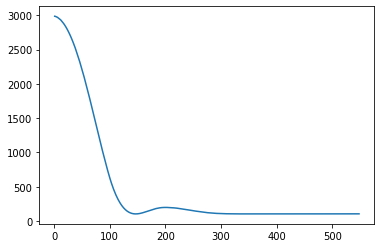

In [14]:
plt.plot(np.arange(1, len(mreg.loss_history) + 1), mreg.loss_history)

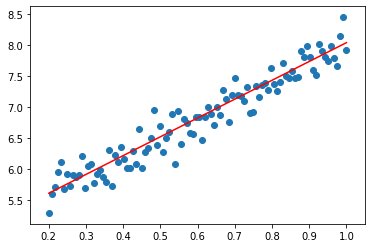

In [15]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], mreg.predict(X), c='r')

In [16]:
reg = LinearRegression().fit(X, y)
reg.coef_

array([0.       , 3.0127439])

#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных, сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [ ]:
# your code here

#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом инерции. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны из себя представлять *красивые* графики!

In [ ]:
# your code here